In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [2]:
file_path = './dataset/'
names = ['Apple', 'Disney', 'HBO', 'Netflix', 'Paramount', 'Prime']

In [3]:
for name in names : 
    with open(file_path+name+"_titles.csv", 'rb') as f:
        df = pd.read_csv(f)
    globals()['{}_df'.format(name)] = df

## 기본 keyBERT

In [4]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

n_gram_range = (2, 2)
stop_words = "english"

In [5]:
for name in names : 
    doc = globals()['{}_df'.format(name)]['description'].dropna().to_list()
    ls = list()

    for x in doc:
        try:count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([x])
        except ValueError:
            pass
        candidates = count.get_feature_names_out()
    
        doc_embedding = model.encode([x])
        candidate_embeddings = model.encode(candidates)

        top_n = 5
        distances = cosine_similarity(doc_embedding, candidate_embeddings)
        keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

        ls.append(keywords)
        
    globals()['{}_words'.format(name)] = list(itertools.chain(*ls))

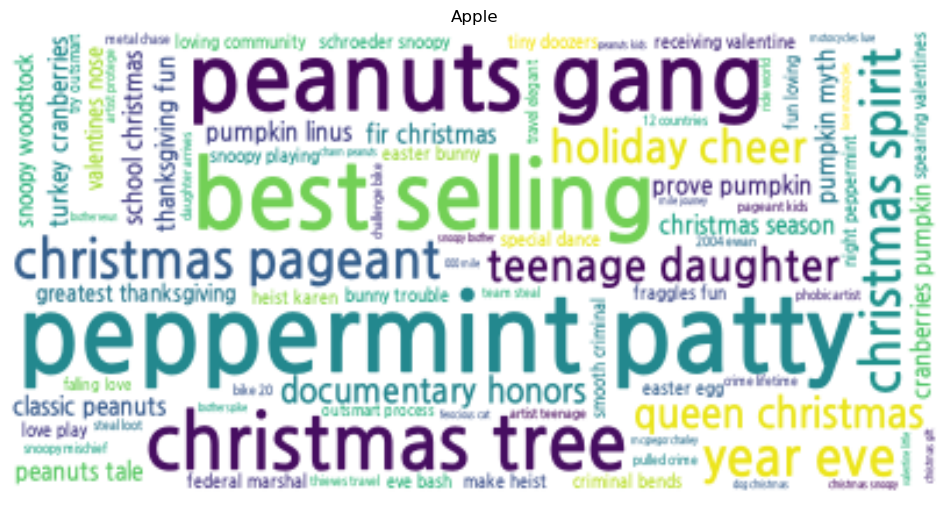

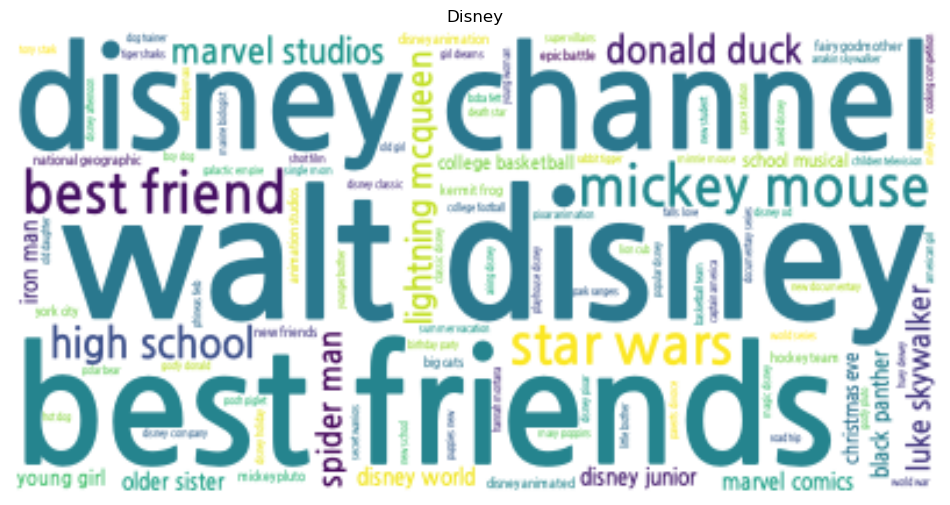

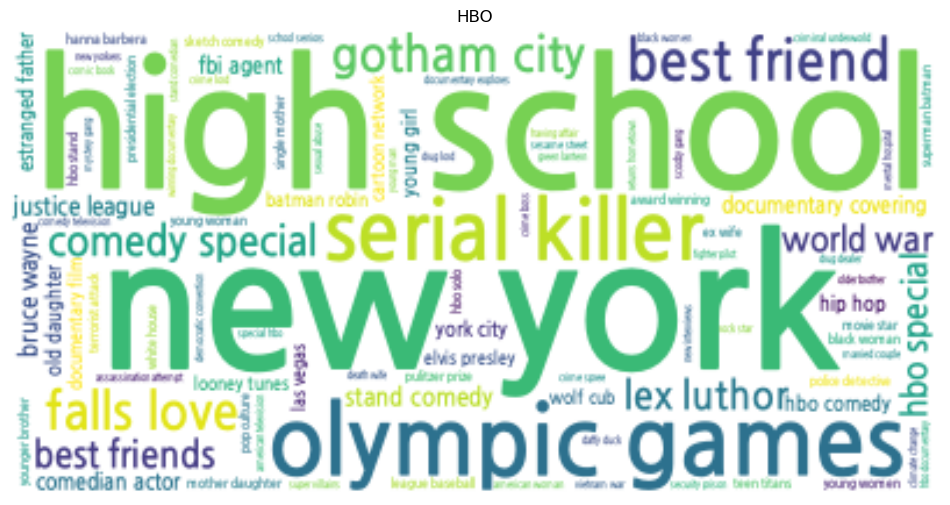

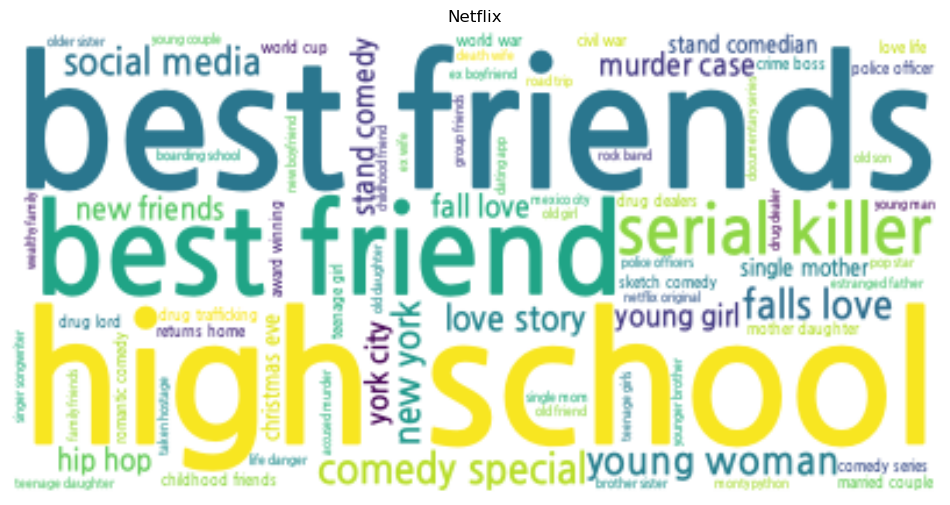

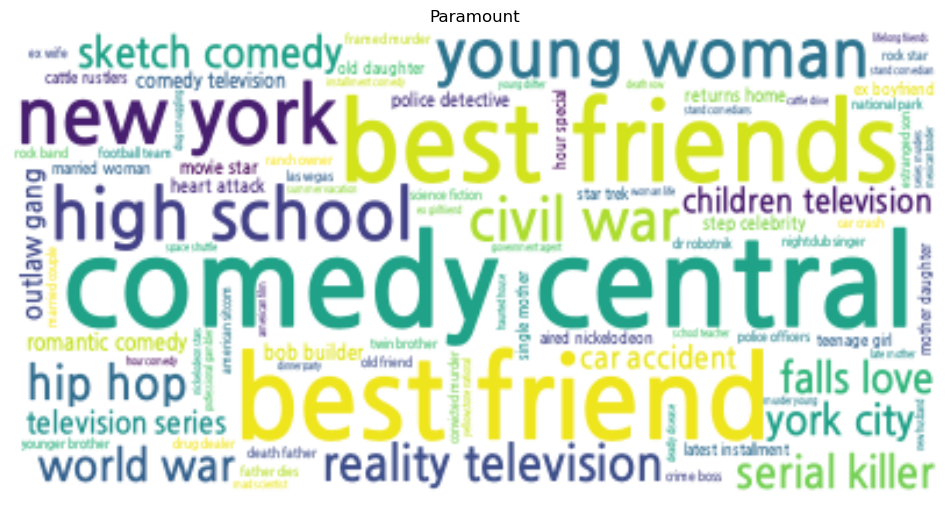

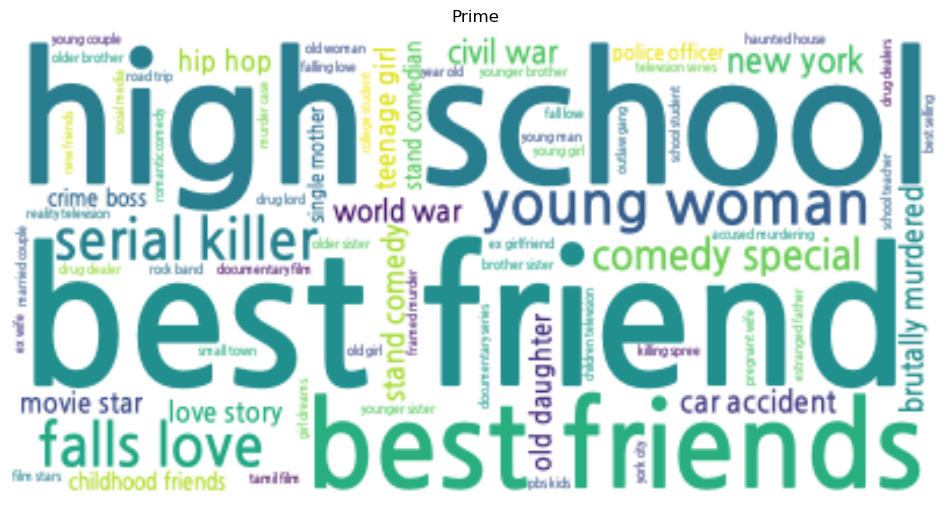

In [8]:
for name in names : 
    counts = Counter(globals()['{}_words'.format(name)])
    tags = counts.most_common(100) 

    wc = WordCloud(font_path='./NanumGothicBold.otf', background_color="white")
    cloud = wc.generate_from_frequencies(dict(tags))

    plt.figure(figsize=(12, 10))
    plt.title(name)
    plt.axis('off')
    plt.imshow(cloud, interpolation='bilinear')
    plt.show()